In [23]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib 
import matplotlib.pyplot as plt
import sklearn
import re
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import PorterStemmer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import text
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from bs4 import BeautifulSoup

In [24]:
d_train=pd.read_csv("train.csv")
d_test = pd.read_csv("test.csv")

In [40]:
d_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10158 entries, 0 to 10157
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10158 non-null  int64  
 1   query                10158 non-null  object 
 2   product_title        10158 non-null  object 
 3   product_description  7714 non-null   object 
 4   median_relevance     10158 non-null  int64  
 5   relevance_variance   10158 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 476.3+ KB


In [42]:
d_train.product_description.fillna('',inplace=True)
d_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10158 entries, 0 to 10157
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10158 non-null  int64  
 1   query                10158 non-null  object 
 2   product_title        10158 non-null  object 
 3   product_description  10158 non-null  object 
 4   median_relevance     10158 non-null  int64  
 5   relevance_variance   10158 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 476.3+ KB


In [43]:
d_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22513 entries, 0 to 22512
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   22513 non-null  int64 
 1   query                22513 non-null  object
 2   product_title        22513 non-null  object
 3   product_description  17086 non-null  object
dtypes: int64(1), object(3)
memory usage: 703.7+ KB


In [44]:
d_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10158 entries, 0 to 10157
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10158 non-null  int64  
 1   query                10158 non-null  object 
 2   product_title        10158 non-null  object 
 3   product_description  10158 non-null  object 
 4   median_relevance     10158 non-null  int64  
 5   relevance_variance   10158 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 476.3+ KB


<AxesSubplot:>

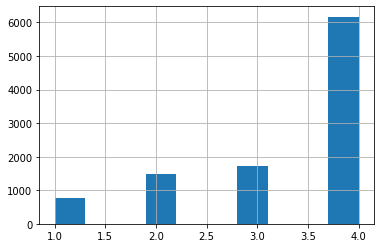

In [20]:
d_train.median_relevance.hist()

<AxesSubplot:>

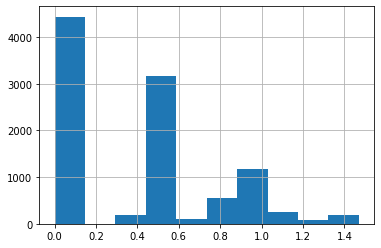

In [21]:
d_train.relevance_variance.hist()


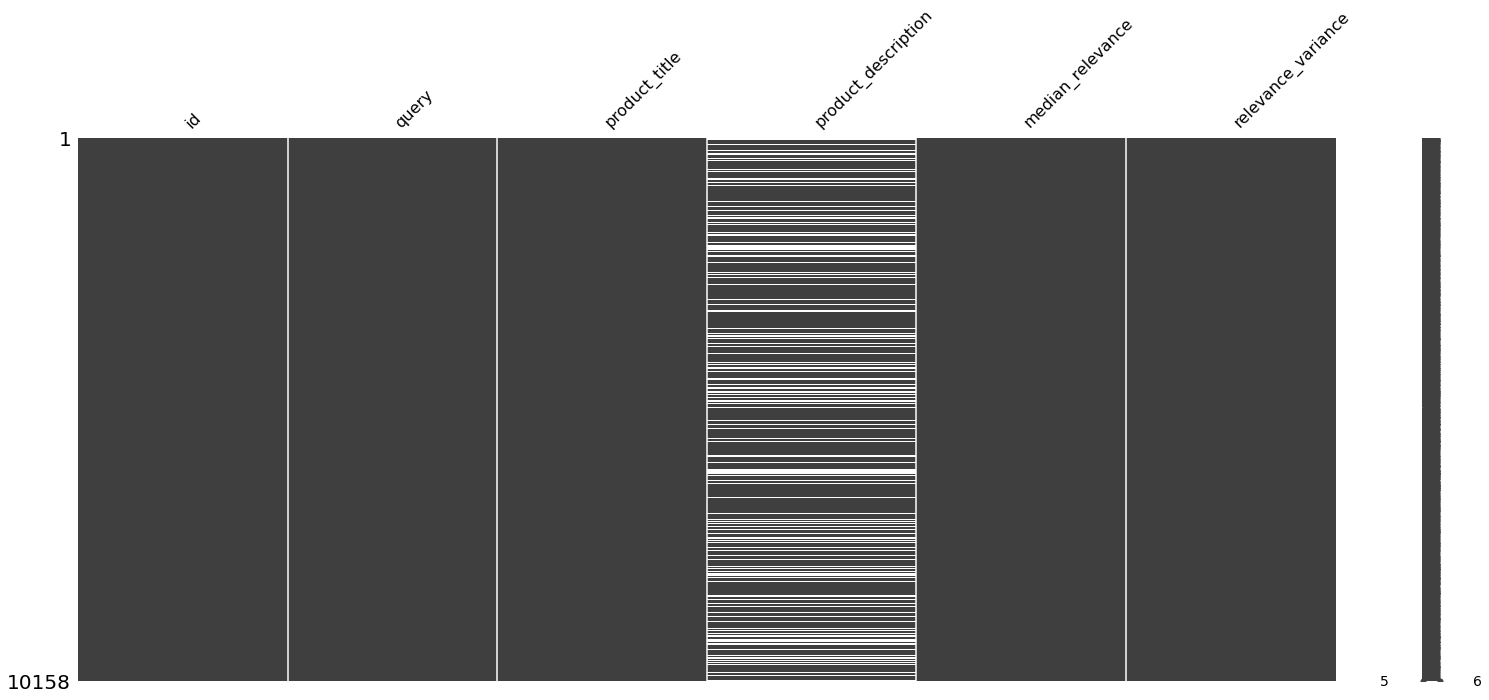

In [38]:
#checking for missing values in dataset 
import missingno 

ax=missingno.matrix(d_train)

In [52]:
d_train.head(15)

,id,query,product_title,product_description,median_relevance,relevance_variance
0,1,bridal shower decorations,Accent Pillow with Heart Design - Red/Black,Red satin accent pillow embroidered with a hea...,1,0.000
1,2,led christmas lights,Set of 10 Battery Operated Multi LED Train Chr...,Set of 10 Battery Operated Train Christmas Lig...,4,0.000
2,4,projector,ViewSonic Pro8200 DLP Multimedia Projector,,4,0.471
3,5,wine rack,Concept Housewares WR-44526 Solid-Wood Ceiling...,"Like a silent and sturdy tree, the Southern En...",4,0.000
4,7,light bulb,Wintergreen Lighting Christmas LED Light Bulb ...,"WTGR1011\nFeatures\nNickel base, 60,000 averag...",2,0.471
5,8,oakley polarized radar,Oakley Sunglasses - Radar Path Polished Black/...,"Durability and all-day comfort of lightweight,...",3,1.166
6,10,boyfriend jeans,How To Make An American Quilt (DVD),ITEM#: 2518897\nDirector Jocelyn Moorhouse's f...,1,0.000
7,13,screen protector samsung,ZAGG InvisibleShield Cell Phone Screen Protect...,Protect your most precious technology with the...,4,0.000
8,17,pots and pans set,Cook N Home Stainless Steel 4-Piece Pasta Cook...,This ultimate pasta and vegetable steamer cook...,2,0.632
9,20,waffle maker,Presto FlipSide Electric Waffle Maker- 03510,Please the waffle lover in your family with th...,4,0.471


In [64]:
stemmer = PorterStemmer()
sw=[]
ML_STOP_WORDS = ['http','www','img','border','color','style','padding','table','font','inch','width','height']
ML_STOP_WORDS += list(text.ENGLISH_STOP_WORDS)
for stw in ML_STOP_WORDS:
    sw.append("z"+str(stw))
ML_STOP_WORDS += sw
for i in range(len(ML_STOP_WORDS)):
    ML_STOP_WORDS[i]=stemmer.stem(ML_STOP_WORDS[i])

def clean(f3):
    f2=""
    if len(f2)<3:
        f2="feature2null"
    if len(f3)<3:
        f3="feature3null"
    tx = BeautifulSoup(f3)
    tx1 = [x.extract() for x in tx.findAll('script')]
    tx = tx.get_text(" ").strip()
    s = (" ").join(["z"+ str(z) for z in f2.split(" ")]) + " " + tx
    s = re.sub("[^a-zA-Z0-9]"," ", s)
    s = re.sub("[0-9]{1,3}px"," ", s)
    s = re.sub(" [0-9]{1,6} |000"," ", s)
    s = (" ").join([stemmer.stem(z) for z in s.split(" ") if len(z)>2])
    s = s.lower()
    return s



idx = d_test.id.values.astype(int)

d_train.drop('id',axis=1)
d_test.drop('id',axis=1)

y = d_train.median_relevance.values

d_train2 = d_train.copy()
d_train.drop(['median_relevance','relevance_variance'],axis=1)

traindata = np.array(d_train.apply(lambda x:'%s %s %s' % (x['query'],x['product_title'],x['product_description']),axis=1))
testdata = np.array(d_test.apply(lambda x:'%s %s %s' % (x['query'],x['product_title'],x['product_description']),axis=1))

for i in range(len(traindata)):
    traindata[i]=clean(traindata[i])
for i in range(len(testdata)):
    testdata[i]=clean(testdata[i])


tsvd = TruncatedSVD(n_components=200, algorithm='randomized', n_iter=5, random_state=None, tol=0.0)
scaler = StandardScaler()
tfidf = TfidfVectorizer(max_features=2500,min_df=0.0,max_df=0.4,stop_words=ML_STOP_WORDS,ngram_range=(1,3),use_idf=True,smooth_idf=True,sublinear_tf=True,analyzer='word')
classifier = SVC(C=10.0, kernel='rbf', degree=3, gamma=0.001, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, random_state=None)
parameters = { 'class__n_estimators': (10,50,100) }
pipe = Pipeline([('tfidf',tfidf),
                 ('tsvd',tsvd),
                 ('scl',scaler),
                 ('class',classifier)])
#grid_search = GridSearchCV(pipe,parameters)
pipe.fit(traindata,y)
predicted = pipe.predict(testdata) #pipe.predict(testdata)

df_res = pd.DataFrame()
df_res['id']=idx
df_res['prediction']=predicted





In [60]:
df_res['prediction'].value_counts()

4    19944
2     1157
1      840
3      572
Name: prediction, dtype: int64

In [61]:
accuracy = int(df_res.prediction[df_res.prediction==4].value_counts()) * 100 / len(df_res.prediction) 
accuracy

print('the accuracy of the model trained is:' , accuracy , '%')

the accuracy of the model trained is: 88.58881535113046 %


In [62]:
len(d_test)

22513

In [63]:
len(df_res)

22513

In [65]:
d_test_new = d_test.copy()

In [66]:
d_test_new.head()

,id,query,product_title,product_description
0,3,electric griddle,Star-Max 48 in Electric Griddle,NaN
1,6,phillips coffee maker,Philips SENSEO HD7810 WHITE Single Serve Pod C...,NaN
2,9,san francisco 49ers,2013 San Francisco 49ers Clock,A 2013 San Francisco 49ers clock is the ultima...
3,11,aveeno shampoo,AVEENO 10.5FLOZ NRSH SHINE SH,"Water, Ammonium Lauryl Sulfate, Dimethicone, S..."
4,12,flea and tick control for dogs,Merial Frontline Plus Flea and Tick Control fo...,NaN


In [67]:
d_test.head()

,id,query,product_title,product_description
0,3,electric griddle,Star-Max 48 in Electric Griddle,NaN
1,6,phillips coffee maker,Philips SENSEO HD7810 WHITE Single Serve Pod C...,NaN
2,9,san francisco 49ers,2013 San Francisco 49ers Clock,A 2013 San Francisco 49ers clock is the ultima...
3,11,aveeno shampoo,AVEENO 10.5FLOZ NRSH SHINE SH,"Water, Ammonium Lauryl Sulfate, Dimethicone, S..."
4,12,flea and tick control for dogs,Merial Frontline Plus Flea and Tick Control fo...,NaN


In [68]:
df_res.head()

,id,prediction
0,3,4
1,6,4
2,9,3
3,11,4
4,12,4


In [69]:
d_test_new['median_relevance'] = df_res['prediction']

In [70]:
d_test_new.head()

,id,query,product_title,product_description,median_relevance
0,3,electric griddle,Star-Max 48 in Electric Griddle,NaN,4
1,6,phillips coffee maker,Philips SENSEO HD7810 WHITE Single Serve Pod C...,NaN,4
2,9,san francisco 49ers,2013 San Francisco 49ers Clock,A 2013 San Francisco 49ers clock is the ultima...,3
3,11,aveeno shampoo,AVEENO 10.5FLOZ NRSH SHINE SH,"Water, Ammonium Lauryl Sulfate, Dimethicone, S...",4
4,12,flea and tick control for dogs,Merial Frontline Plus Flea and Tick Control fo...,NaN,4


In [81]:
d_train2=d_train2.drop(['relevance_variance' ], axis=1)

In [82]:
combined_df = pd.concat([d_train2, d_test_new], axis=0)
combined_df = combined_df.drop_duplicates('id')
print(combined_df.shape)

(32671, 5)


In [83]:
combined_df.head()

,id,query,product_title,product_description,median_relevance
0,1,bridal shower decorations,Accent Pillow with Heart Design - Red/Black,Red satin accent pillow embroidered with a hea...,1
1,2,led christmas lights,Set of 10 Battery Operated Multi LED Train Chr...,Set of 10 Battery Operated Train Christmas Lig...,4
2,4,projector,ViewSonic Pro8200 DLP Multimedia Projector,,4
3,5,wine rack,Concept Housewares WR-44526 Solid-Wood Ceiling...,"Like a silent and sturdy tree, the Southern En...",4
4,7,light bulb,Wintergreen Lighting Christmas LED Light Bulb ...,"WTGR1011\nFeatures\nNickel base, 60,000 averag...",2


In [84]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32671 entries, 0 to 22512
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   32671 non-null  int64 
 1   query                32671 non-null  object
 2   product_title        32671 non-null  object
 3   product_description  27244 non-null  object
 4   median_relevance     32671 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.5+ MB


In [85]:
combined_df['product_description'] = combined_df['product_description'].fillna("")

In [86]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32671 entries, 0 to 22512
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   32671 non-null  int64 
 1   query                32671 non-null  object
 2   product_title        32671 non-null  object
 3   product_description  32671 non-null  object
 4   median_relevance     32671 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.5+ MB
